In [3]:
import scanpy as sc
#import session_info
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import seaborn as sns
import math
#from plotnine import *
#import scvi
import os
#import celltypist
#import scanpy
# verbosity: errors (0), warnings (1), info (2), hints (3)
%matplotlib inline
sc.settings.verbosity = 0




In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "supp"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14,14))


# scRNA

In [4]:
#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.v8_nohealthy')
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.nohealthy'
adata=sc.read_h5ad(PATH)
adata_5k=adata[adata.obs["tech"]=="xenium"].copy()
adata=adata[adata.obs["tech"]!="xenium"].copy()

#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna')
import gc
gc.collect()

8749

In [5]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST






In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)



In [7]:
sc.pp.normalize_total(adata_5k, target_sum=1e4)
sc.pp.log1p(adata_5k)

In [7]:
# CATEGORY="lvl5_annotation"

# try:
#     adata.obs["trm"] = adata.obs[CATEGORY].astype(str) + "__" +  adata.obs["Site_status"].astype(str)
#     #CATEGORY="lvl3_annotation_patient_status"
#     adata.obs["trm"].value_counts()
# except:
#     1

In [8]:
import gc
gc.collect()

0

In [9]:
KEEP = adata_5k.obs['lvl5_annotation'].unique().tolist()
adata=adata[adata.obs['lvl5_annotation'].isin(KEEP)]

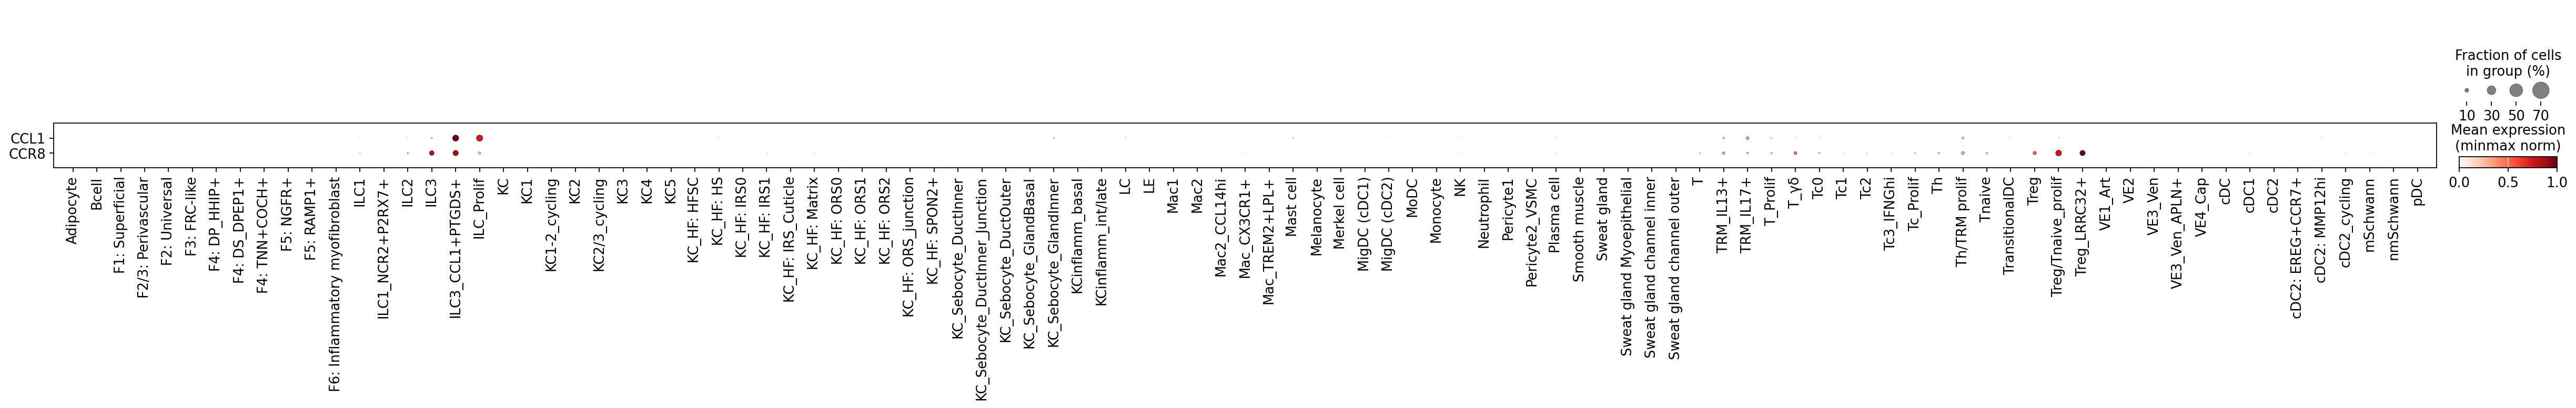

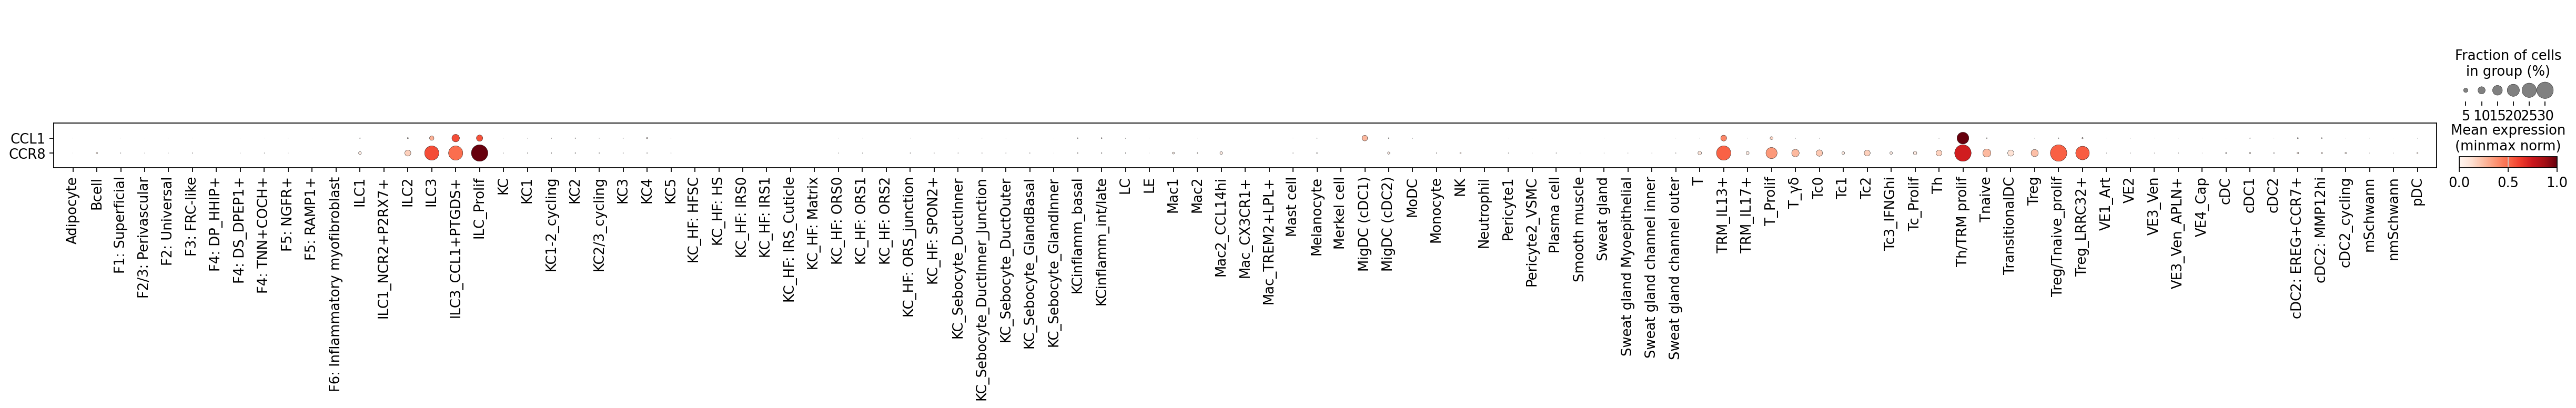

In [16]:
sc.pl.dotplot(adata, 
              remove_markers(["CCL1", "CCR8"]),
              groupby="lvl5_annotation",
              dendrogram=False, 
                standard_scale="var",
              dot_max=.7,
              colorbar_title="Mean expression\n(minmax norm)",
              swap_axes=True,
             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()],
             save="supp1d_ccl1expression_scrna.pdf"
             )

sc.pl.dotplot(adata_5k, 
              remove_markers(["CCL1", "CCR8"]),
              groupby="lvl5_annotation",
              dendrogram=False, 
                standard_scale="var",
              dot_max=.3,
              colorbar_title="Mean expression\n(minmax norm)",
                            swap_axes=True,
save='supp1d_ccl1expression_xenium.pdf'
             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()],
             # save="supp1d_tdotplot.pdf"
             )

 

# try with ptgds

In [13]:
#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.v8_nohealthy')
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna'
adata=sc.read_h5ad(PATH)
#adata_5k=adata[adata.obs["tech"]=="xenium"].copy()
#adata=adata[adata.obs["tech"]!="xenium"].copy()

#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna')
import gc
gc.collect()

13139

In [14]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)



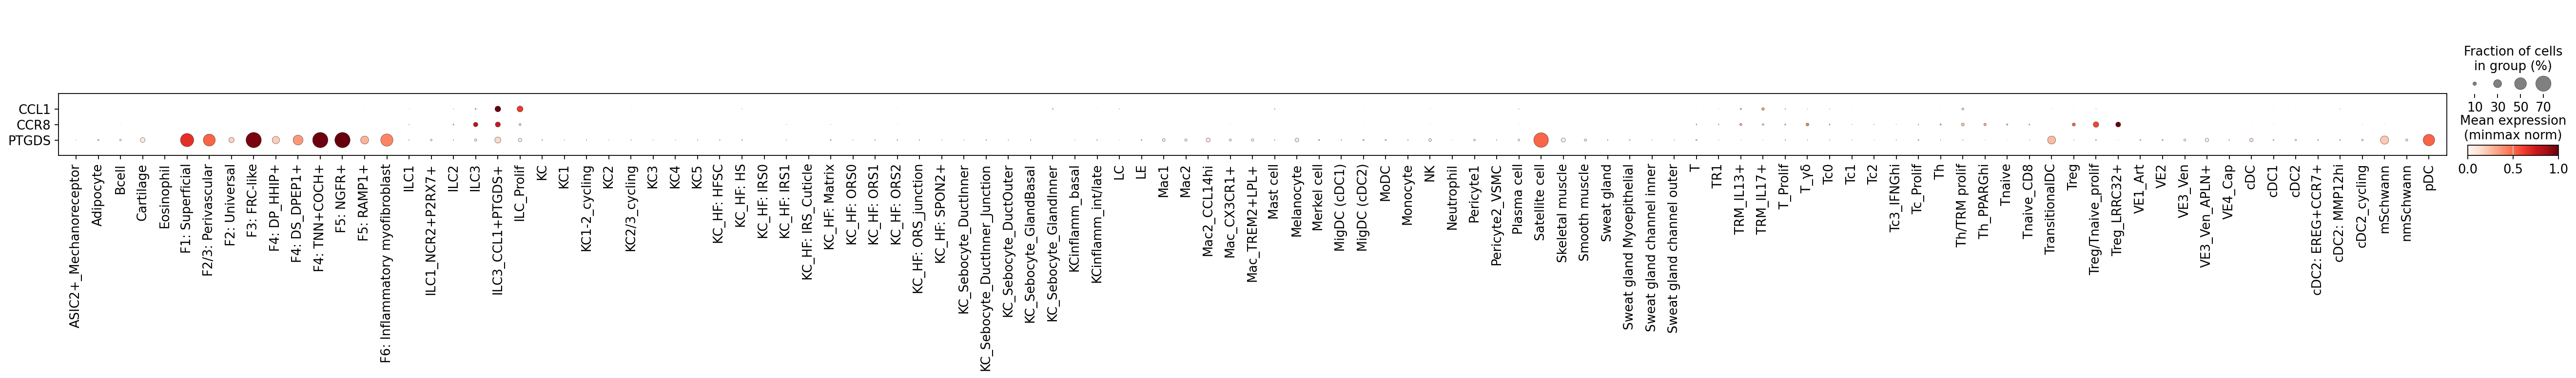

In [15]:
sc.pl.dotplot(adata, 
              ["CCL1", "CCR8", "PTGDS"],
              groupby="lvl5_annotation",
              dendrogram=False, 
                standard_scale="var",
              dot_max=.7,
              colorbar_title="Mean expression\n(minmax norm)",
              swap_axes=True,
             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()],
         #    save="supp1d_ccl1expression_scrna.pdf"
             )
 